<center>UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE</center>
<center>CENTRO DE TECNOLOGIA</center>
<center>DEPARTAMENTO DE ENGENHARIA DE COMPUTAÇÃO E AUTOMAÇÃO</center>
<center>DISCIPLINA DE PROCESSAMENTO DIGITAL DE SINAIS</center>

<b>ALUNO:</b>  Eric Calasans de Barros 

<b>MAT.:  </b>20170155390

<b>PROF.:  </b>Pedro Yochinori Gushiken

<center><h1><b>PROVA - 2ª UNIDADE</b></h1></center>

<h3>Questão 1:</h3>

<h3>a)</h3>


Sejam os sinais $x_{a}(t) = sen(2 \pi f_{1} t) + sen(2 \pi f_{2} t) + sen(2 \pi f_{3} t)$ e $x_{2}$ tal que:
* $3 sen(2 \pi f_{1} t)$, se $0 \leq t < 1$
* $3 sen(2 \pi f_{2} t)$, se $1 \leq t < 2$
* $3 sen(2 \pi f_{3} t)$, se $2 \leq t < \infty$


Conforme instruções dadas no escopo da prova, os valores de $f_{1}, f_{2}$ e $f_{3}$ são, respectivamente, para $a = 5, b = 3$ e $c = 9$:

$$f_{1} = a = 5Hz$$

$$f_{2} = 10a + b = 10.5 + 3 = 53Hz$$

$$f_{3} = 100a + 10b + c = 100.5 + 10.3 + 9 = 539Hz$$

Assim, temos que os seguintes sinais:
$$x_{a}(t) = sen(2 \pi .5 t) + sen(2 \pi .53 t) + sen(2 \pi .539 t) = sen(10 \pi t) + sen(106 \pi t) + sen(1078 \pi t)$$

E:
* $3 sen(10 \pi t)$, se $0 \leq t < 1$
* $3 sen(106 \pi t)$, se $1 \leq t < 2$
* $3 sen(1078 \pi t)$, se $2 \leq t < \infty$

Ainda, segundo dados da prova, ambos os sinais foram amostrados a uma frequência de <b>10.000Hz</b> durante <b>3s</b>.  Dessa forma, cada amostra foi obtida a cada <b>$10^{-4}$s</b> e, em tempo discreto, obtemos $x_{1}[n]$:

$$x_{1}[n] = sen(10 \pi n) + sen(106 \pi n) + sen(1078 \pi n)$$ 

 e $x_{2}[n]:$

* $3 sen(10 \pi t)$, se $0 \leq n < 10000 $
* $3 sen(106 \pi t)$, se $10000 \leq n < 20000$
* $3 sen(1078 \pi t)$, se $20000 \leq n < 30000$

Utilizando a linguagem Python e suas bibliotecas, produzimos as sequências $x_{1}[n]$ e $x_{2}[n]$ conforme demonstrado a seguir:

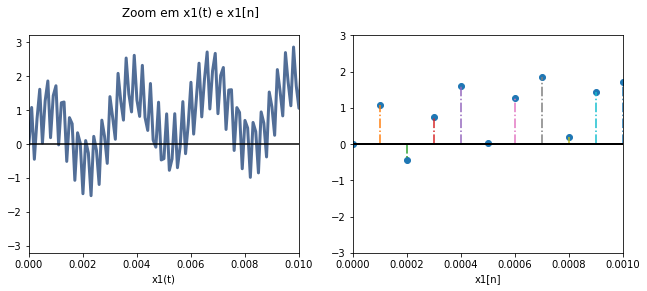

In [2]:
import numpy as np
from ThinkDSP import thinkdsp
from ThinkDSP import thinkplot # Bibliotecas para PDS(https://github.com/AllenDowney/ThinkDSP)
import scipy
import math
import matplotlib.pyplot as plt

%matplotlib inline

DOIS_PI = 2 * math.pi
FREQ_AMOSTRAGEM = 10000 # Em Hz
PERIODO_AMOSTRAGEM = 1/FREQ_AMOSTRAGEM

# Frequências calculadas conforme a matrícula
freq1 = 5 * DOIS_PI
freq2  = 53 * DOIS_PI
freq3 = 539 * DOIS_PI

# Senóides 
x11_t = thinkdsp.SinSignal(freq1)
x12_t = thinkdsp.SinSignal(freq2)
x13_t = thinkdsp.SinSignal(freq3)

# Sequências x1_n e x2_n
x1_t = x11_t + x12_t + x13_t

x1_n = x1_t.make_wave(duration=0.1, start=0, framerate=FREQ_AMOSTRAGEM)

x21_t = thinkdsp.SinSignal(freq1, amp=3)
x22_t = thinkdsp.SinSignal(freq2, amp=3)
x23_t = thinkdsp.SinSignal(freq3, amp=3)

w21_n = x21_t.make_wave(duration=1, start=0, framerate=FREQ_AMOSTRAGEM) 
w22_n = x22_t.make_wave(duration=1, start=1, framerate=FREQ_AMOSTRAGEM)
w23_n = x23_t.make_wave(duration=1, start=2, framerate=FREQ_AMOSTRAGEM)

x2_n = (w21_n + w22_n + w23_n)

# Gráficos
# x1_n
plt.subplot(1,2,1)
plt.suptitle('Zoom em x1(t) e x1[n]')
x1_n.plot()
plt.xlim(0,0.01)
plt.xlabel('x1(t)')
plt.axhline(y=0, color='k')

plt.subplot(1,2,2)
markerline, stemlines, baseline = plt.stem(x1_n.ts, x1_n.ys, '-.')
plt.setp(baseline, color='k', linewidth=2)
plt.xlim(0,0.001)
plt.ylim(-3,3)
plt.xlabel('x1[n]')
plt.subplots_adjust(right=1.5)
plt.show()

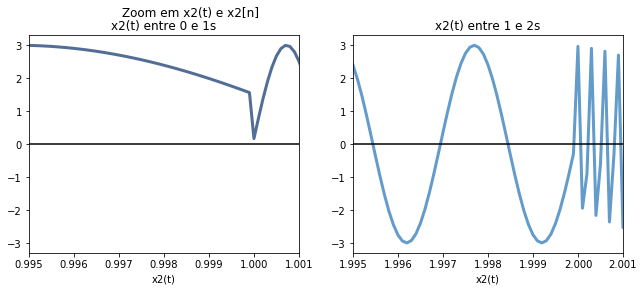

In [17]:
# x1_n
plt.subplot(1,2,1)
plt.suptitle('Zoom em x2(t) e x2[n]')
plt.title('x2(t) entre 0 e 1s')
x2_n.plot()
plt.xlim(0.995, 1.001)
plt.xlabel('x2(t)')
plt.axhline(y=0, color='k')

plt.subplot(1,2,2)
plt.title('x2(t) entre 1 e 2s')
x2_n.plot()
plt.xlim(1.995, 2.001)
plt.xlabel('x2(t)')
plt.axhline(y=0, color='k')
plt.subplots_adjust(right=1.5)

plt.show()

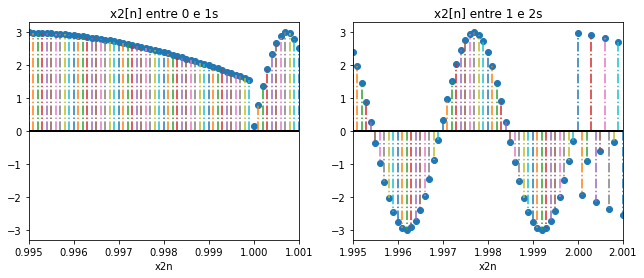

In [16]:
plt.subplot(1,2,1)
m, s, b = plt.stem(x2_n.ts, x2_n.ys, '-.')
plt.xlim(0.995, 1.001)
plt.setp(b, color='k', linewidth=2)
plt.xlabel('x2n')
plt.title('x2[n] entre 0 e 1s')
plt.axhline(y=0, color='k')

plt.subplot(1,2,2)
m, s, b = plt.stem(x2_n.ts, x2_n.ys, '-.')
plt.xlim(1.995, 2.001)
plt.setp(b, color='k', linewidth=2)
plt.xlabel('x2n')
plt.title('x2[n] entre 1 e 2s')
plt.axhline(y=0, color='k')
plt.subplots_adjust(right=1.5)
plt.show()

<h3>b)</h3>

Sejam:

* $\Omega_{1} = 2 \pi f_{1} = 10 \pi$
* $\Omega_{2} = 2 \pi f_{2} = 106 \pi$
* $\Omega_{3} = 2 \pi f_{3} = 1078 \pi$

Sejam também 
$$X(\Omega) = \sum_{n = -\infty}^{\infty}x[n] e^{-j \Omega n}$$
a <b>equação de análise</b> da DTFT,
$$sen(\Omega n) = \frac{e^{j \Omega n} - e^{-j \Omega n}}{2j}$$
e a soma dos termos de uma <b>série geométrica</b> dada por
$$\sum_{n = 0}^{N} = \frac{1 - r^{N + 1}}{1 - r}$$
podemos deduzir a fórmula analítica para $X_{1}(\Omega)$ e $X_{2}(\Omega)$, para o intervalo de 0 a N-1:
$$X_{1}(\Omega) = \sum_{n = 0}^{N - 1}[sen(\Omega_{1} \pi t) + sen(\Omega_{2} \pi t) + sen(\Omega_{3} \pi t)] e^{-j \Omega n}$$

$$X_{1}(\Omega) = \sum_{n = 0}^{N - 1}[sen(\Omega_{1} \pi t)]e^{-j \Omega n} + \sum_{n = 0}^{N - 1}[sen(\Omega_{2} \pi t)]e^{-j \Omega n} + \sum_{n = 0}^{N - 1}[sen(\Omega_{3} \pi t)] e^{-j \Omega n}$$

$$X_{1}(\Omega) = \sum_{n = 0}^{N - 1}[\frac{e^{j \Omega_{1} n} - e^{-j \Omega_{1} n}}{2j}]e^{-j \Omega n} + \sum_{n = 0}^{N - 1}[\frac{e^{j \Omega_{2} n} - e^{-j \Omega_{2} n}}{2j}]e^{-j \Omega n} + \sum_{n = 0}^{N - 1}[\frac{e^{j \Omega_{3} n} - e^{-j \Omega_{3} n}}{2j}] e^{-j \Omega n}$$

$$X_{1}(\Omega) = \frac{1}{2j} \Bigg\{ \sum_{n = 0}^{N - 1}[e^{j \Omega_{1} n} - e^{-j \Omega_{1} n}]e^{-j \Omega n} + \sum_{n = 0}^{N - 1}[e^{j \Omega_{2} n} - e^{-j \Omega_{2} n}]e^{-j \Omega n} + \sum_{n = 0}^{N - 1}[e^{j \Omega_{3} n} - e^{-j \Omega_{3} n}] e^{-j \Omega n} \Bigg\}$$

$$X_{1}(\Omega) = \frac{1}{2j} \Bigg\{ \sum_{n = 0}^{N - 1}[e^{jn (\Omega_{1} - \Omega)} - e^{-jn (\Omega_{1} + \Omega)}] + \sum_{n = 0}^{N - 1}[e^{jn (\Omega_{2} - \Omega)} - e^{-jn (\Omega_{2} + \Omega)}] + \sum_{n = 0}^{N - 1}[e^{jn (\Omega_{3} - \Omega)} - e^{-jn (\Omega_{3} + \Omega)}] \Bigg\}$$

$$X_{1}(\Omega) = \frac{1}{2j} \Bigg\{ \sum_{n = 0}^{N - 1}\bigg[e^{j (\Omega_{1} - \Omega)} \bigg]^{n} - \sum_{n = 0}^{N - 1}\bigg[e^{-j (\Omega_{1} - \Omega)} \bigg]^{n} + \sum_{n = 0}^{N - 1}\bigg[e^{j (\Omega_{2} - \Omega)} \bigg]^{n} - \sum_{n = 0}^{N - 1}\bigg[e^{-j (\Omega_{2} - \Omega)} \bigg]^{n} + \sum_{n = 0}^{N - 1}\bigg[e^{j (\Omega_{3} - \Omega)} \bigg]^{n} - \sum_{n = 0}^{N - 1}\bigg[e^{-j (\Omega_{3} - \Omega)} \bigg]^{n} \Bigg\}$$

$$X_{1}(\Omega) = \frac{1}{2j} \Bigg\{ \frac{1 - e^{jN(\Omega_{1} - \Omega)}}{1 - e^{j(\Omega_{1} - \Omega)}} - \frac{1 - e^{-jN(\Omega_{1} + \Omega)}}{1 - e^{-j(\Omega_{1} + \Omega)}} + \frac{1 - e^{jN(\Omega_{2} - \Omega)}}{1 - e^{j(\Omega_{2} - \Omega)}} - \frac{1 - e^{-jN(\Omega_{2} + \Omega)}}{1 - e^{-j(\Omega_{2} + \Omega)}} + \frac{1 - e^{jN(\Omega_{3} - \Omega)}}{1 - e^{j(\Omega_{3} - \Omega)}} - \frac{1 - e^{-jN(\Omega_{3} + \Omega)}}{1 - e^{-j(\Omega_{3} + \Omega)}}\Bigg\}$$

Para $X_{2}(\Omega)$:
* $\frac{1}{2j} \Bigg\{ \frac{1 - e^{jN(\Omega_{1} - \Omega)}}{1 - e^{j(\Omega_{1} - \Omega)}} - \frac{1 - e^{-jN(\Omega_{1} + \Omega)}}{1 - e^{-j(\Omega_{1} + \Omega)}} \Bigg\}$, para $0 \leq n < 10.000$
* $\frac{1}{2j} \Bigg\{ \frac{1 - e^{jN(\Omega_{2} - \Omega)}}{1 - e^{j(\Omega_{2} - \Omega)}} - \frac{1 - e^{-jN(\Omega_{2} + \Omega)}}{1 - e^{-j(\Omega_{2} + \Omega)}} \Bigg\}$, para $10.000 \leq n < 20.000$
* $\frac{1}{2j} \Bigg\{ \frac{1 - e^{jN(\Omega_{3} - \Omega)}}{1 - e^{j(\Omega_{3} - \Omega)}} - \frac{1 - e^{-jN(\Omega_{3} + \Omega)}}{1 - e^{-j(\Omega_{3} + \Omega)}} \Bigg\}$, para $20.000 \leq n < 30.000$

<b>c)</b> e <b>f)</b> 

O código abaixo mostra a utilização da biblioteca <b>numpy.fft</b> para o cálculo dos espectros de $x_{1}[n]$ e $x_{2}[n]$:


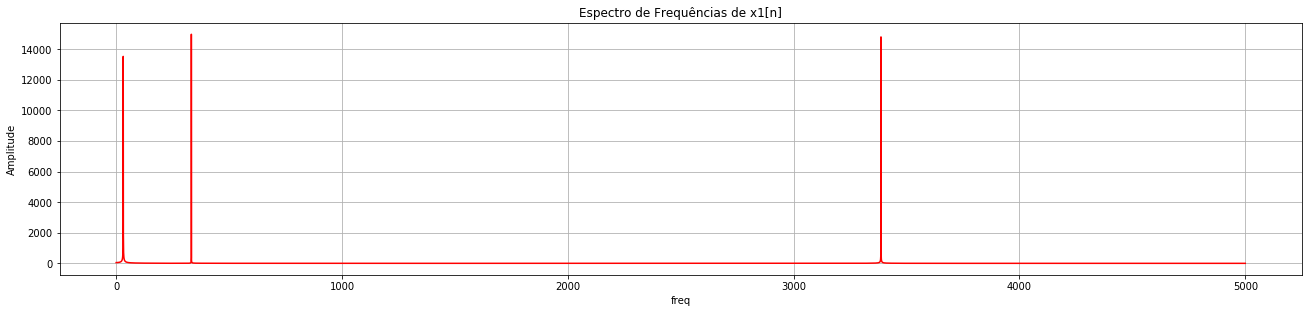

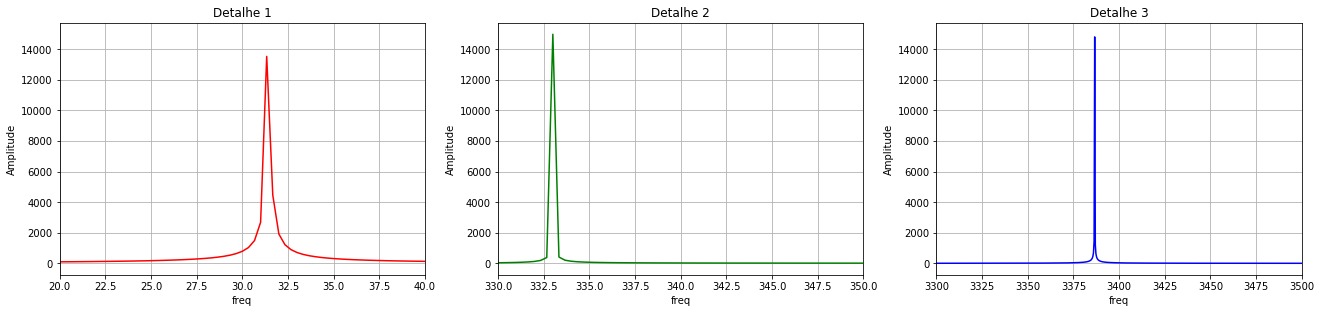

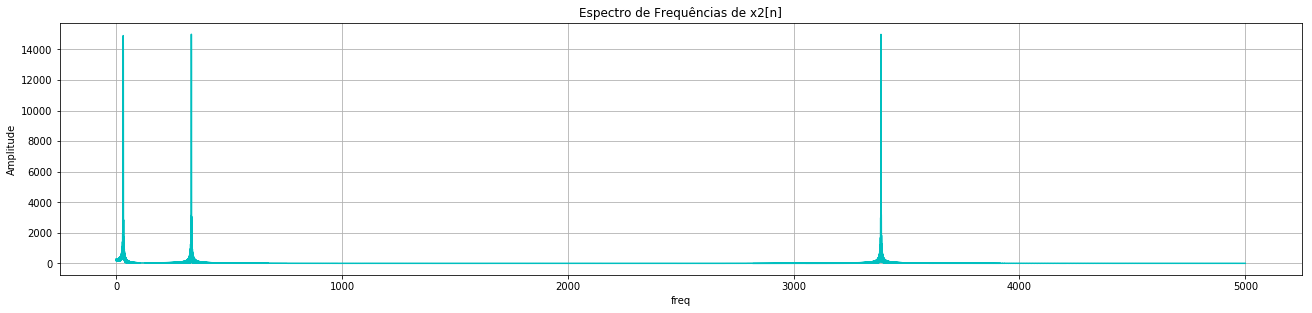

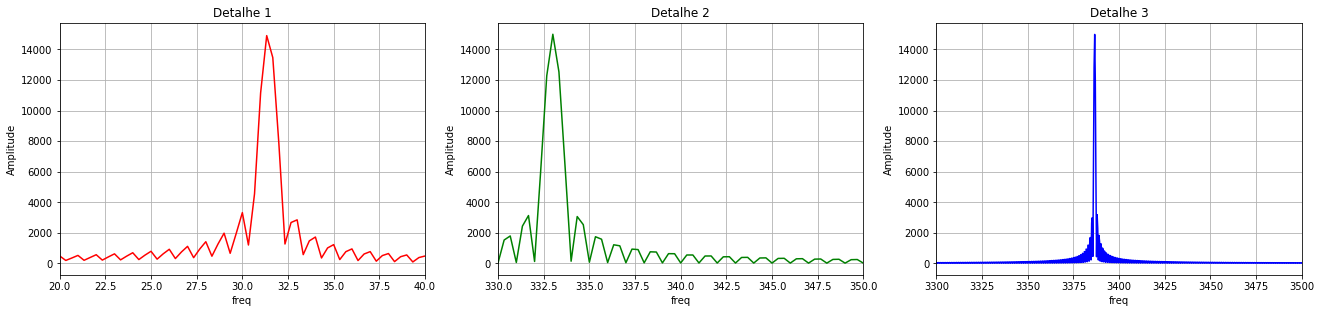

In [62]:
# Calcula o x1 para 3s
x1_n = x1_t.make_wave(duration=3, start=0, framerate=FREQ_AMOSTRAGEM)

# Tamanho do sinal
tam_x1_n = len(x1_n)
tam_x2_n = len(x2_n)

# Quantidade de amostras
k1 = np.arange(tam_x1_n)
k2 = np.arange(tam_x2_n)

# Intervalo entre frequências
T1 = tam_x1_n/FREQ_AMOSTRAGEM
T2 = tam_x2_n/FREQ_AMOSTRAGEM

# Gama de frequências - considerando apenas um lado da gama de frequências
freq_x1_n = k1/T1
freq_x1_n = freq_x1_n[range(0, int(len(freq_x1_n)/2))]

freq_x2_n = k2/T2
freq_x2_n = freq_x1_n[range(0, int(len(freq_x2_n)/2))]

# FFT de x1[n]
x1FFT = np.fft.fft(x1_n.ys)
x1FFT = x1FFT[range(0, int(len(x1FFT)/2))]  # Captura apenas um lado do espectro

# FFT de x2[n]
x2FFT = np.fft.fft(x2_n.ys)
x2FFT = x2FFT[range(0, int(len(x2FFT)/2))]  # Captura apenas um lado do espectro

#Gráfico de x1FFT
amplitude_x1_n = np.abs(x1FFT)
amplitude_x2_n = np.abs(x2FFT)

plt.title('Espectro de Frequências de x1[n]')
plt.plot(freq_x1_n, amplitude_x1_n, 'r')
plt.xlabel('freq')
plt.ylabel('Amplitude')
plt.subplots_adjust(right=3, top=1)
plt.grid()
plt.show()

plt.subplot(1, 3, 1)
plt.title('Detalhe 1')
plt.plot(freq_x1_n, amplitude_x1_n, 'r')
plt.xlabel('freq')
plt.ylabel('Amplitude')
plt.xlim(20, 40)
plt.subplots_adjust(right=3, top=1)
plt.grid()

plt.subplot(1, 3, 2)
plt.title('Detalhe 2')
plt.plot(freq_x1_n, amplitude_x1_n, 'g')
plt.xlabel('freq')
plt.ylabel('Amplitude')
plt.xlim(330, 350)
plt.subplots_adjust(right=3, top=1)
plt.grid()

plt.subplot(1, 3, 3)
plt.title('Detalhe 3')
plt.plot(freq_x1_n, amplitude_x1_n, 'b')
plt.xlabel('freq')
plt.ylabel('Amplitude')
plt.xlim(3300, 3500)
plt.subplots_adjust(right=3, top=1)
plt.grid()
plt.show()

# Gráfico de x2[n]
plt.title('Espectro de Frequências de x2[n]')
plt.plot(freq_x2_n, amplitude_x2_n, 'c')
plt.xlabel('freq')
plt.ylabel('Amplitude')
plt.subplots_adjust(right=3, top=1)
plt.grid()
plt.show()

plt.subplot(1, 3, 1)
plt.title('Detalhe 1')
plt.plot(freq_x2_n, amplitude_x2_n, 'r')
plt.xlabel('freq')
plt.ylabel('Amplitude')
plt.xlim(20, 40)
plt.subplots_adjust(right=3, top=1)
plt.grid()

plt.subplot(1, 3, 2)
plt.title('Detalhe 2')
plt.plot(freq_x2_n, amplitude_x2_n, 'g')
plt.xlabel('freq')
plt.ylabel('Amplitude')
plt.xlim(330, 350)
plt.subplots_adjust(right=3, top=1)
plt.grid()

plt.subplot(1, 3, 3)
plt.title('Detalhe 3')
plt.plot(freq_x2_n, amplitude_x2_n, 'b')
plt.xlabel('freq')
plt.ylabel('Amplitude')
plt.xlim(3300, 3500)
plt.subplots_adjust(right=3, top=1)
plt.grid()
plt.show()

 Pela definição da <i>Transformada Discreta de Fourier(DFT)</i>, temos que:
$$X[k] = X(k \Omega_{0}) = \sum_{n = 0}^{N - 1} x[n] e^{-jk \Omega_{0} n}$$

Considerando $N = 30000$ pontos para a DFT, temos uma resolução de frequência $\Omega_{0}$ tal que:
$$\Omega_{0} = \frac{2 \pi}{N} = \frac{2 \pi}{30000} = \frac{\pi}{15000}$$

O código abaixo implementa as sequências $X_{1}[k]$ e $X_{2}[k]$:


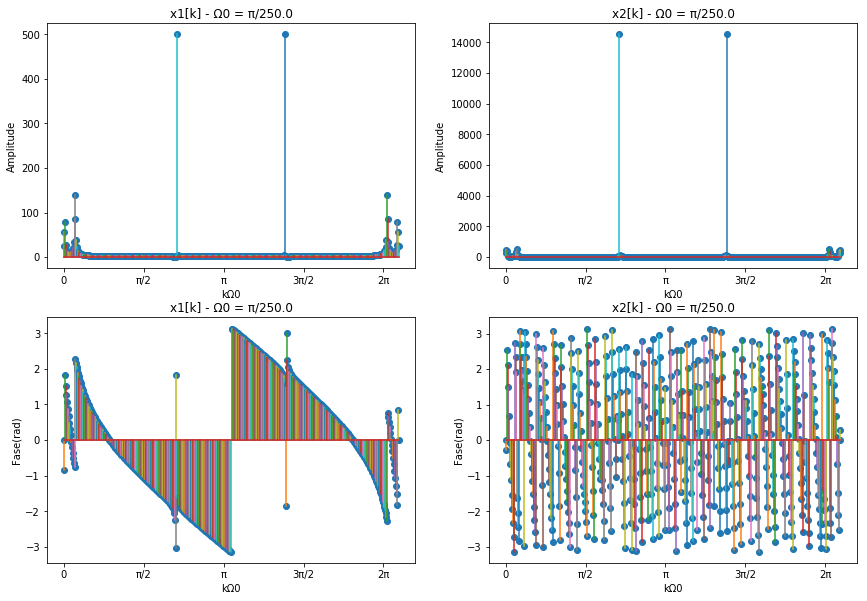

In [4]:
def DFT(x_n, N=1):
    '''
    Função que calcula a DFT para uma determinada sequência

    :param x_n: sequência x[n]
    :param N: número de pontos desejados para a DFT
    :return: array com os valores da DFT para x[n]
    '''

    # Cálculo da definição da frequência(Omega0)
    Omega0 = DOIS_PI / (N-1)

    # Inicializa x[k]
    x_k = np.zeros(N, dtype=np.complex_)

    # Cálculo de x[k]
    for k in range(N):
        soma = 0
        for n in range(len(x_n)):
            expComplexa = np.exp(-1j * Omega0 * k * n)
            produto = x_n[n] * expComplexa
            soma = soma + produto
        x_k[k] = soma

    return (x_k, Omega0)

PI = 'π'

tam = 500

# Cálculo de x1_[k] e x2_[k]
x1_k = DFT(x_n=x1_n.ys, N=tam)
x2_k = DFT(x_n=x2_n.ys, N=tam)

# Gráficos de amplitude e fase
# x1_k
k = np.arange(len(x1_k[0]))

kOmega0 = k * x1_k[1]

labels_x = ('0', '{}/2'.format(PI), '{}'.format(PI),'3{}/2'.format(PI), '2{}'.format(PI))

plt.subplot(2,2,1)
plt.stem(kOmega0, np.abs(x1_k[0]), '-')
plt.xticks(np.linspace(0,6,5), labels_x)
plt.xlabel('kΩ0')
plt.ylabel('Amplitude')
plt.title('x1[k] - Ω0 = π/{}'.format(tam/2))

plt.subplot(2,2,2)
plt.stem(kOmega0, np.abs(x2_k[0]), '-')
plt.xticks(np.linspace(0,6,5), labels_x)
plt.xlabel('kΩ0')
plt.ylabel('Amplitude')
plt.title('x2[k] - Ω0 = π/{}'.format(tam/2))

plt.subplot(2,2,3)
plt.stem(kOmega0, np.angle(x1_k[0]), '-')
plt.xticks(np.linspace(0,6,5), labels_x)
plt.xlabel('kΩ0')
plt.ylabel('Fase(rad)')
plt.title('x1[k] - Ω0 = π/{}'.format(tam/2))

plt.subplot(2,2,4)
plt.stem(kOmega0, np.angle(x2_k[0]), '-')
plt.xticks(np.linspace(0,6,5), labels_x)
plt.xlabel('kΩ0')
plt.ylabel('Fase(rad)')
plt.title('x2[k] - Ω0 = π/{}'.format(tam/2))
plt.subplots_adjust(right=2, top=2, hspace=0.2)
plt.show()